# Análise de Mortes por Overdose de Opioides nos Estados Unidos

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Multiple Cause of Death 1999-2014 v1.1.csv', sep=',')

## Análise Exploratória

In [3]:
# Visualizar dataframe
data.head()

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149


In [4]:
# Informações das colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   State                                                            816 non-null    object
 1   Year                                                             816 non-null    int64 
 2   Deaths                                                           816 non-null    object
 3   Population                                                       816 non-null    int64 
 4   Crude Rate                                                       816 non-null    object
 5   Crude Rate Lower 95% Confidence Interval                         816 non-null    object
 6   Crude Rate Upper 95% Confidence Interval                         816 non-null    object
 7   Prescriptions Dispensed by US Retailers in that year (

In [5]:
# Total de registros
data.count()

State                                                              816
Year                                                               816
Deaths                                                             816
Population                                                         816
Crude Rate                                                         816
Crude Rate Lower 95% Confidence Interval                           816
Crude Rate Upper 95% Confidence Interval                           816
Prescriptions Dispensed by US Retailers in that year (millions)    816
dtype: int64

In [6]:
# Total de nulos
data.isnull().sum()

State                                                              0
Year                                                               0
Deaths                                                             0
Population                                                         0
Crude Rate                                                         0
Crude Rate Lower 95% Confidence Interval                           0
Crude Rate Upper 95% Confidence Interval                           0
Prescriptions Dispensed by US Retailers in that year (millions)    0
dtype: int64

In [7]:
# Total de NaN
data.isna().sum()

State                                                              0
Year                                                               0
Deaths                                                             0
Population                                                         0
Crude Rate                                                         0
Crude Rate Lower 95% Confidence Interval                           0
Crude Rate Upper 95% Confidence Interval                           0
Prescriptions Dispensed by US Retailers in that year (millions)    0
dtype: int64

In [8]:
# Total de dados duplicatos
data.duplicated().sum()

np.int64(0)

## Preprocessamento

Não há dados faltantes, duplicatos, nulos e NaN.


In [9]:
# Remover linhas com valores ausentes ou suprimidos
drop_rows = data[ (data['Deaths'] == 'Suppressed') | (data['Deaths'] == 'Unreliable') | (data['Crude Rate'] == 'Suppressed') | (data['Crude Rate'] == 'Unreliable') ].index
data.drop(drop_rows , inplace=True)
data

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149
...,...,...,...,...,...,...,...,...
811,Wyoming,2010,49,563626,8.7,6.4,11.5,210
812,Wyoming,2011,47,568158,8.3,6.1,11,219
813,Wyoming,2012,47,576412,8.2,6,10.8,217
814,Wyoming,2013,52,582658,8.9,6.7,11.7,207


## Análise Estatística Detalhada

### Mortes


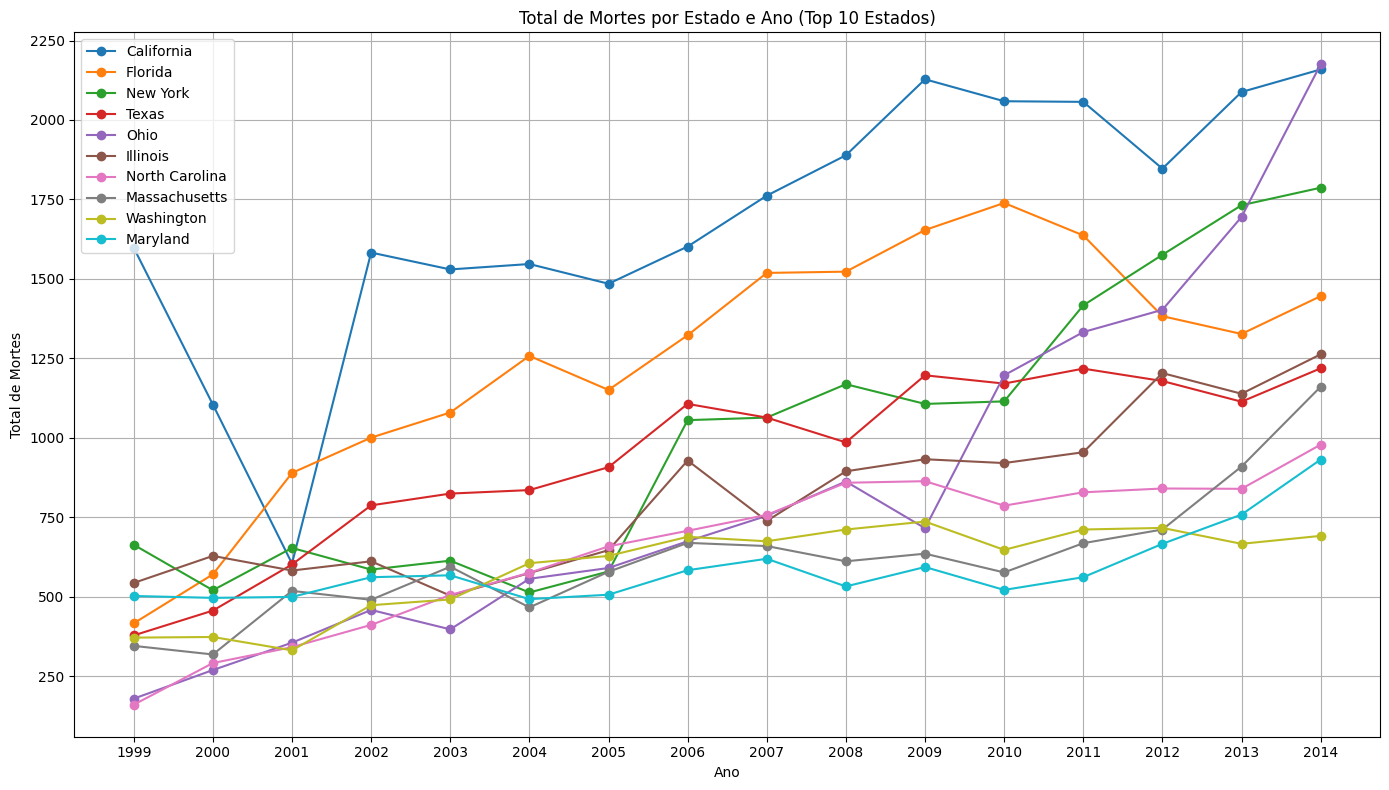

In [10]:
# Converter 'Deaths' para numérico
data['Deaths'] = pd.to_numeric(data['Deaths'])

# Calcular o número total de mortes por estado e por ano
total_deaths = data.groupby(['State', 'Year'])['Deaths'].sum()

# Calcular o total de mortes por estado
total_deaths_per_state = total_deaths.groupby('State').sum()

# Selecionar os 10 estados com o maior número total de mortes
top_10_states = total_deaths_per_state.nlargest(10).index

# Ordenar os anos
sorted_years = sorted(data['Year'].unique())

# Plot
plt.figure(figsize=(14, 8))
for state in top_10_states:
    state_data = total_deaths[state]
    state_data_sorted = state_data.reindex(sorted_years)  # Reordenar os dados de acordo com os anos
    plt.plot(state_data_sorted.index, state_data_sorted.values, marker='o', label=state)

plt.title('Total de Mortes por Estado e Ano (Top 10 Estados)')
plt.xlabel('Ano')
plt.ylabel('Total de Mortes')
plt.xticks(sorted_years)  # Usar os anos ordenados no eixo x
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

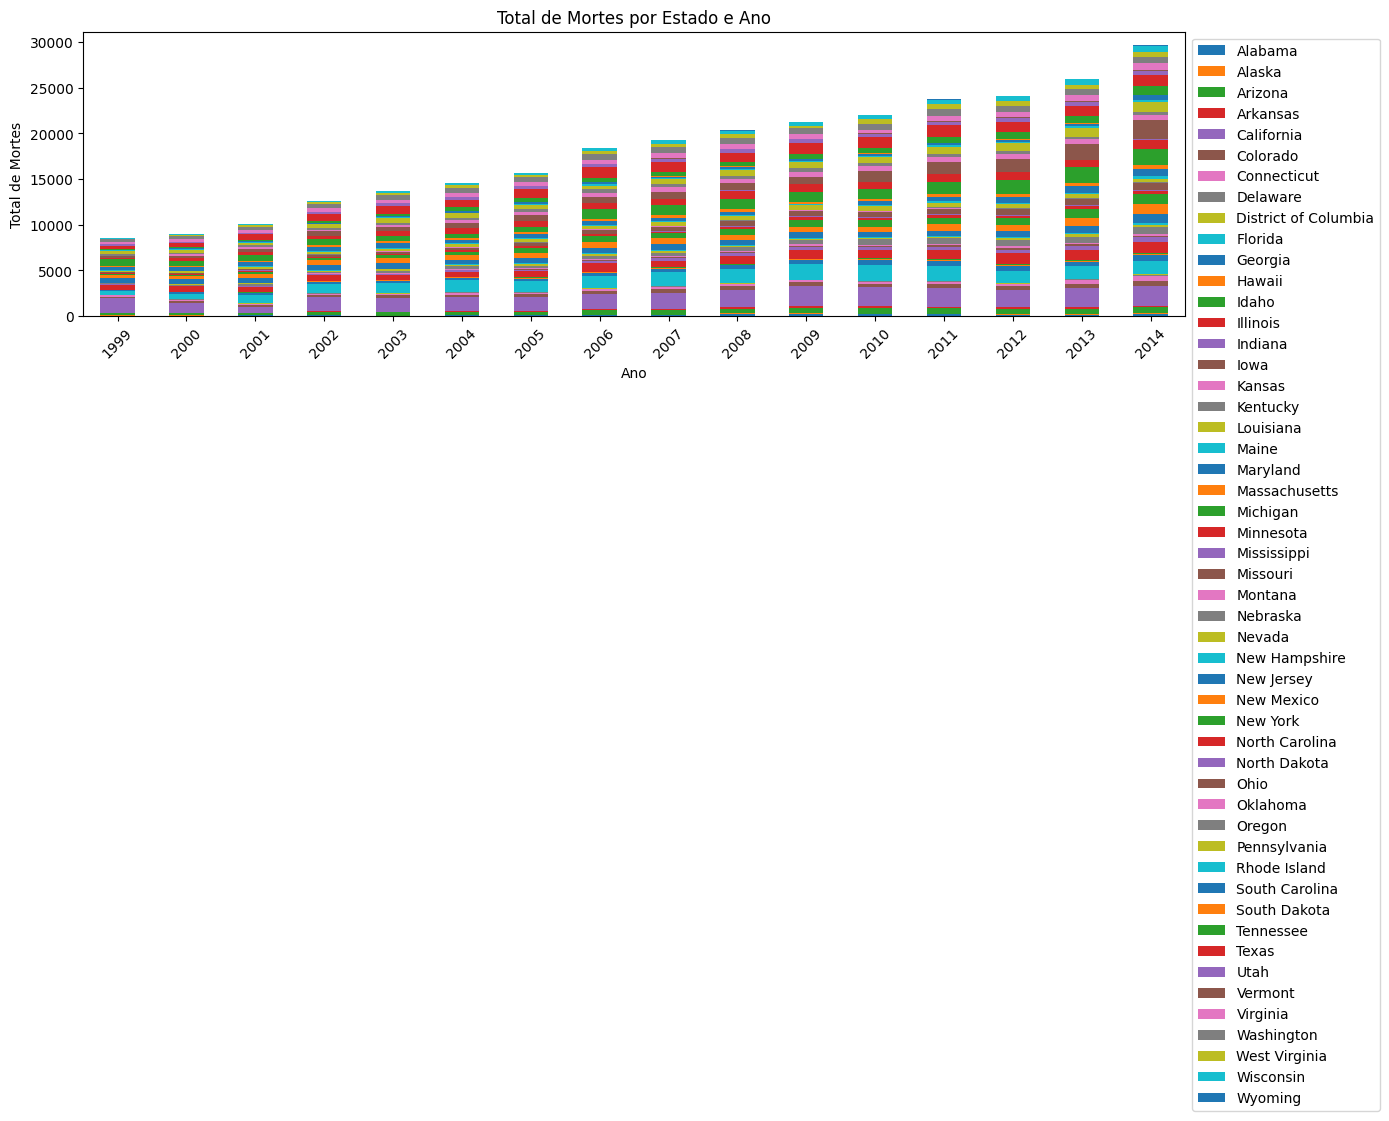

In [11]:
pivot_data = data.pivot_table(index='Year', columns='State', values='Deaths', aggfunc='sum')

plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Total de Mortes por Estado e Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Mortes')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


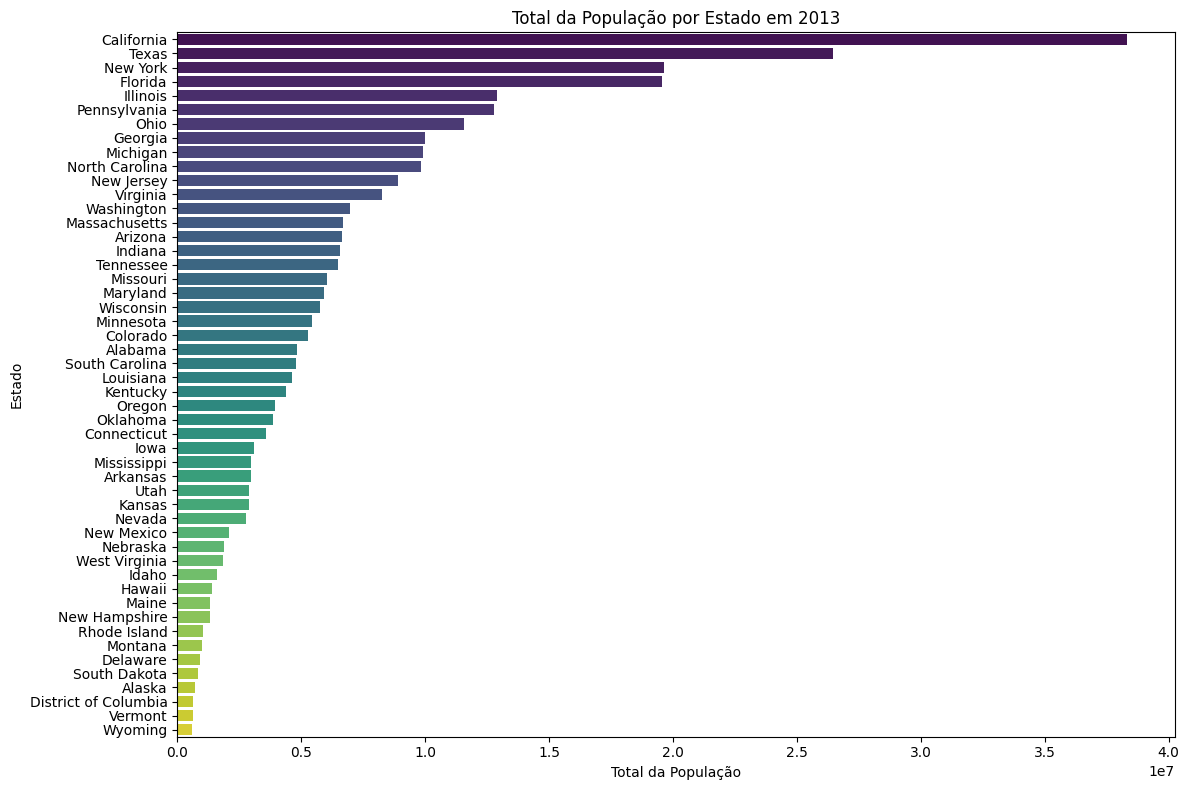

In [12]:
# Filtrar o último ano disponível no conjunto de dados
last_year_data = data[data['Year'] == 2013]

# Calcular o total da população por estado no último ano
total_population_last_year = last_year_data.groupby('State')['Population'].sum().reset_index().sort_values(by='Population', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=total_population_last_year, x='Population', y='State', palette='viridis', hue='State', legend=False)
plt.title('Total da População por Estado em 2013')
plt.xlabel('Total da População')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()


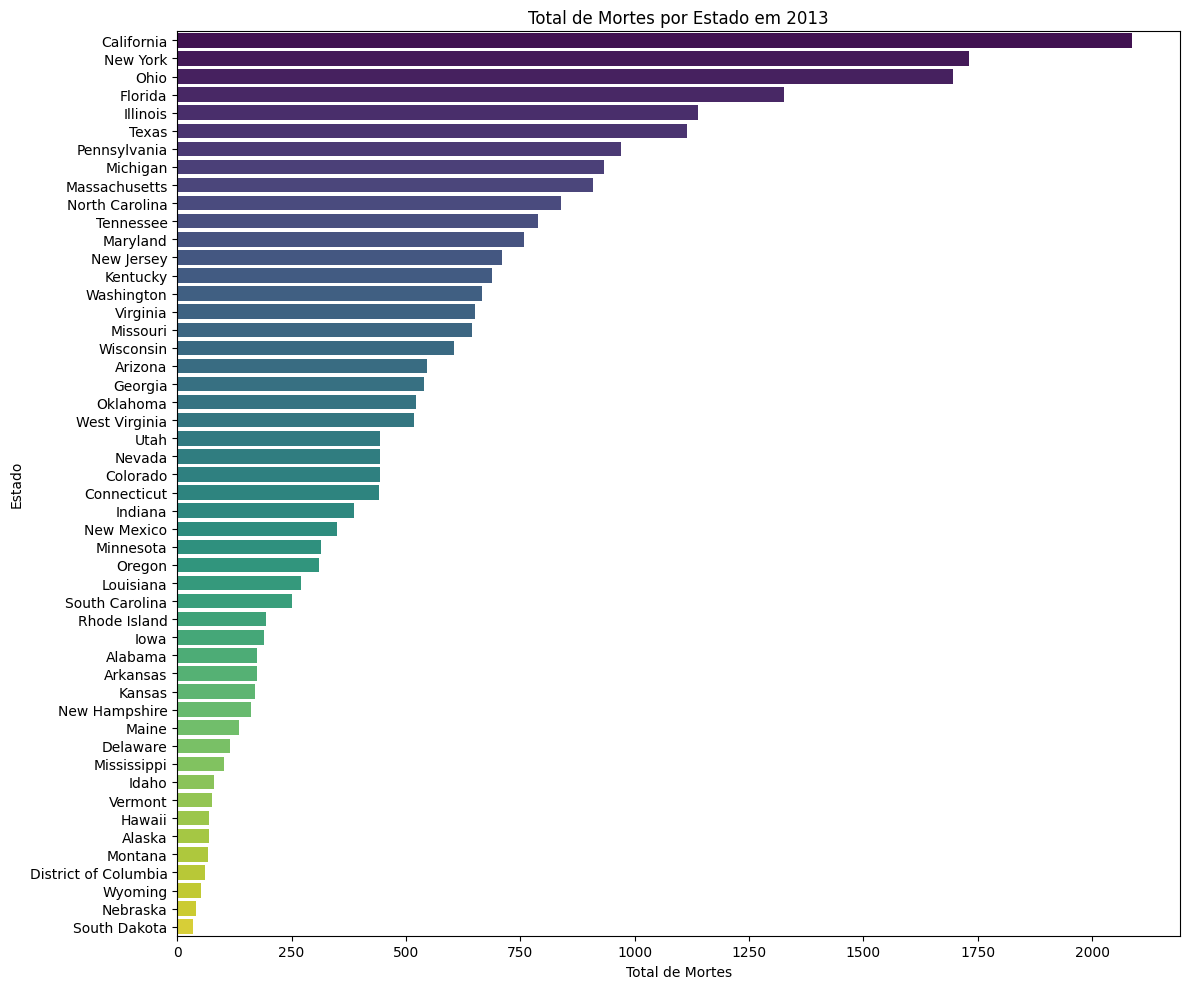

In [13]:
# Filtrar o último ano disponível no conjunto de dados
last_year_data = data[data['Year'] == 2013]

# Calcular o número total de mortes por estado para o último ano
total_deaths_last_year = last_year_data.groupby('State')['Deaths'].sum().reset_index()

# Ordenar os estados pelo total de mortes
total_deaths_last_year = total_deaths_last_year.sort_values(by='Deaths', ascending=False)

# Plotar o gráfico de barras horizontais
plt.figure(figsize=(12, 10))
sns.barplot(x='Deaths', y='State', data=total_deaths_last_year, palette='viridis', hue='State', legend=False)
plt.title('Total de Mortes por Estado em 2013')
plt.xlabel('Total de Mortes')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()


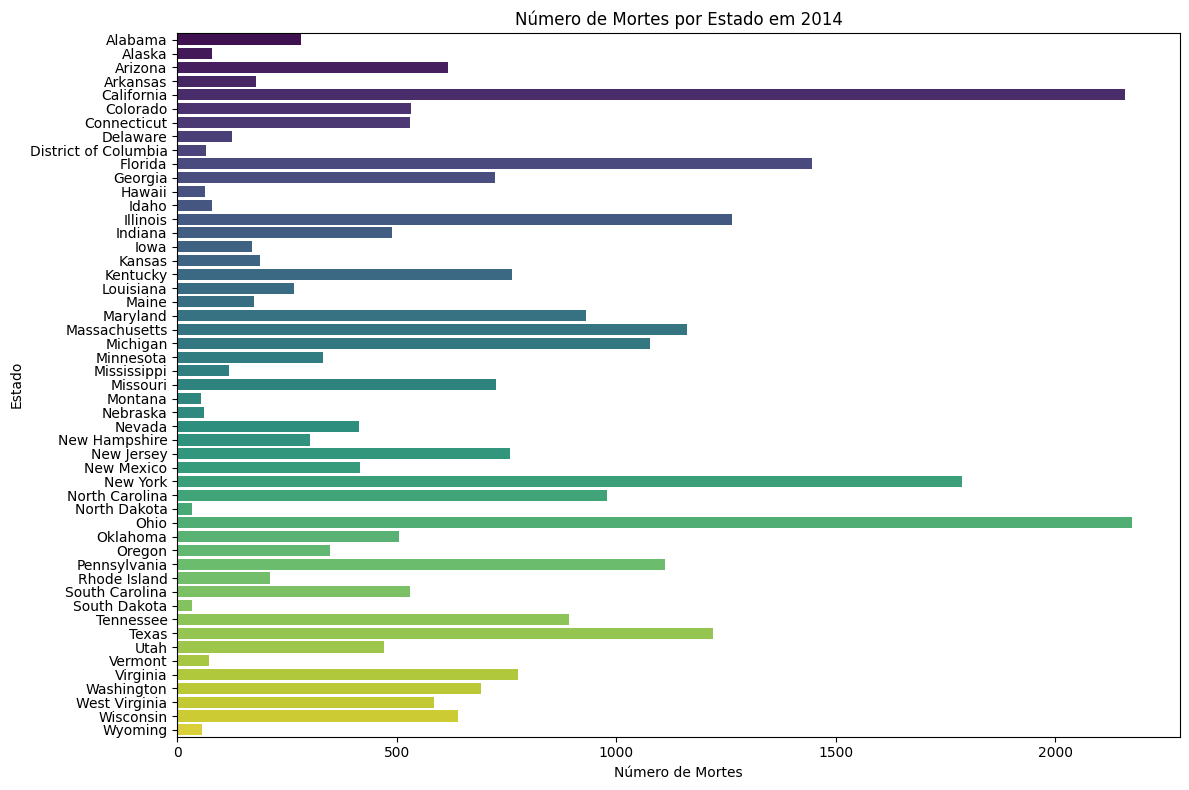

In [14]:
# Filtrar os dados para o ano de 2014
data_2014 = data[data['Year'] == 2014]

# Calcular o número total de mortes por estado em 2014
total_deaths_2014 = data_2014.groupby('State')['Deaths'].sum().reset_index()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.barplot(data=total_deaths_2014, x='Deaths', y='State', palette='viridis', hue='State', legend=False)
plt.title('Número de Mortes por Estado em 2014')
plt.xlabel('Número de Mortes')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

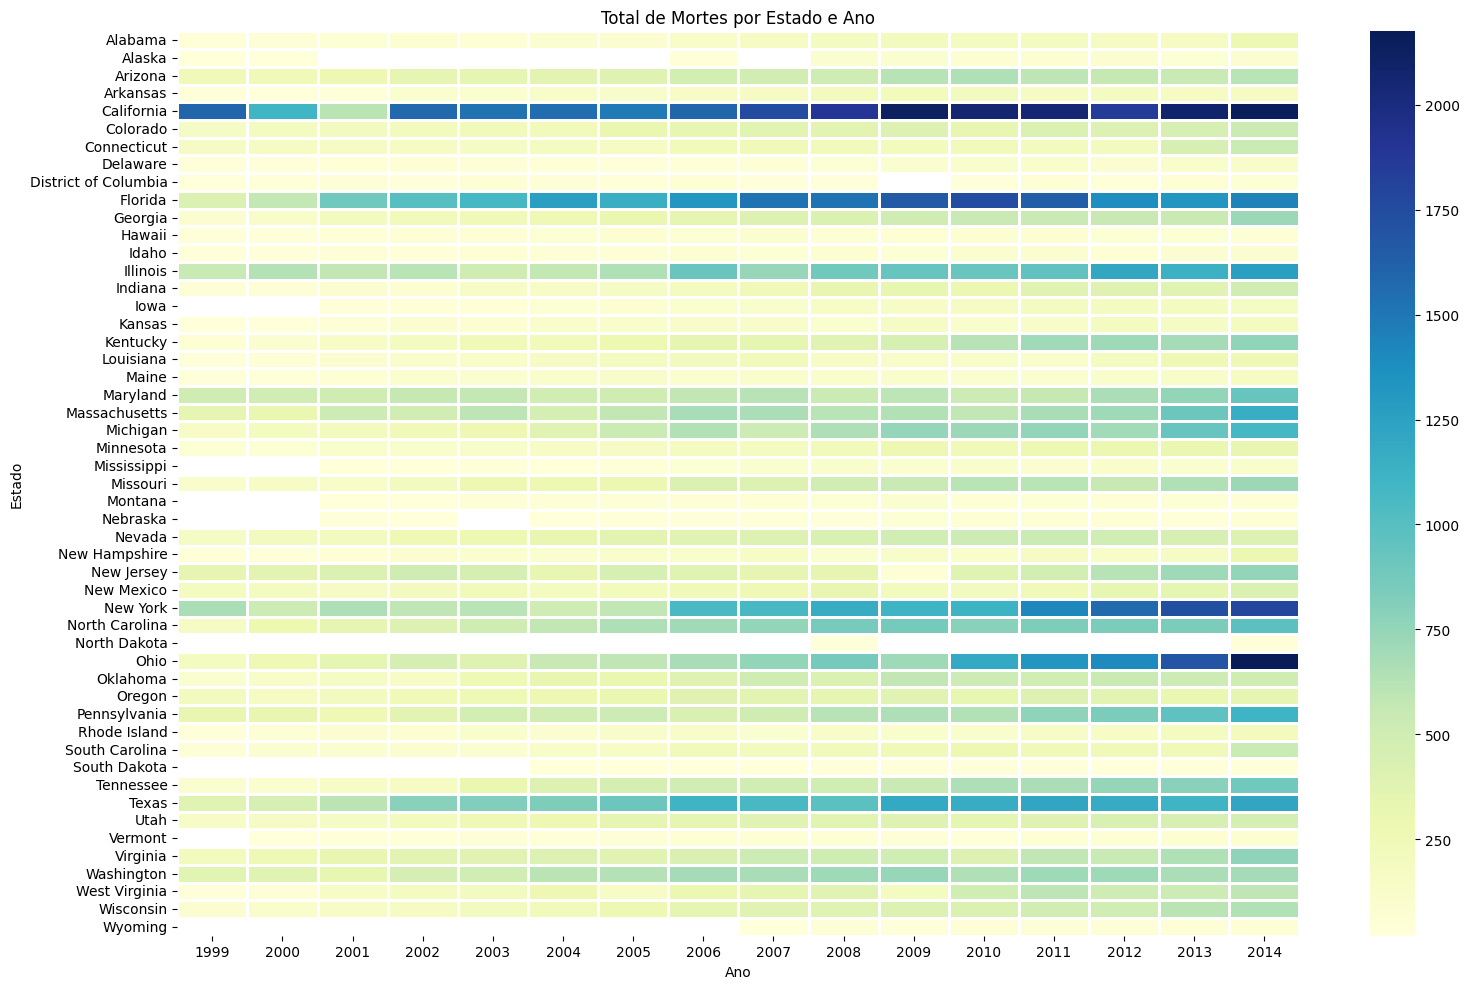

In [15]:
# Converter 'Population' para numérico
data['Population'] = pd.to_numeric(data['Population'], errors='coerce')

# Calcular o número total de mortes por estado e por ano
total_deaths = data.groupby(['State', 'Year'])['Deaths'].sum().reset_index()

# Adicionar a coluna 'Population' ao DataFrame total_deaths
total_deaths = total_deaths.merge(data[['State', 'Year', 'Population']], on=['State', 'Year'])

# Criar uma pivot table para facilitar a visualização
pivot_table = total_deaths.pivot_table(index='State', columns='Year', values='Deaths')

# Plotar o mapa de calor
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', linecolor='white', linewidth=1)
plt.title('Total de Mortes por Estado e Ano')
plt.xlabel('Ano')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

In [16]:
# Convertendo as colunas relevantes para numérico
data[['Deaths', 'Population', 'Crude Rate', 'Prescriptions Dispensed by US Retailers in that year (millions)']] = data[['Deaths', 'Population', 'Crude Rate', 'Prescriptions Dispensed by US Retailers in that year (millions)']].apply(pd.to_numeric)

# Calculando a média de mortes por estado e prescrições
avg_deaths = data.groupby('State')[['Deaths', 'Prescriptions Dispensed by US Retailers in that year (millions)']].mean().sort_values(by='Deaths', ascending=False)

# Exibindo as 10 primeiras entradas
avg_deaths.head(10)


,Deaths,Prescriptions Dispensed by US Retailers in that year (millions)
State,,
California,1690.2500,174.625
Florida,1244.9375,174.625
New York,1009.7500,174.625
Texas,940.6250,174.625
Ohio,851.4375,174.625
Illinois,817.0000,174.625
North Carolina,650.8125,174.625
Massachusetts,620.1875,174.625
Washington,595.5000,174.625


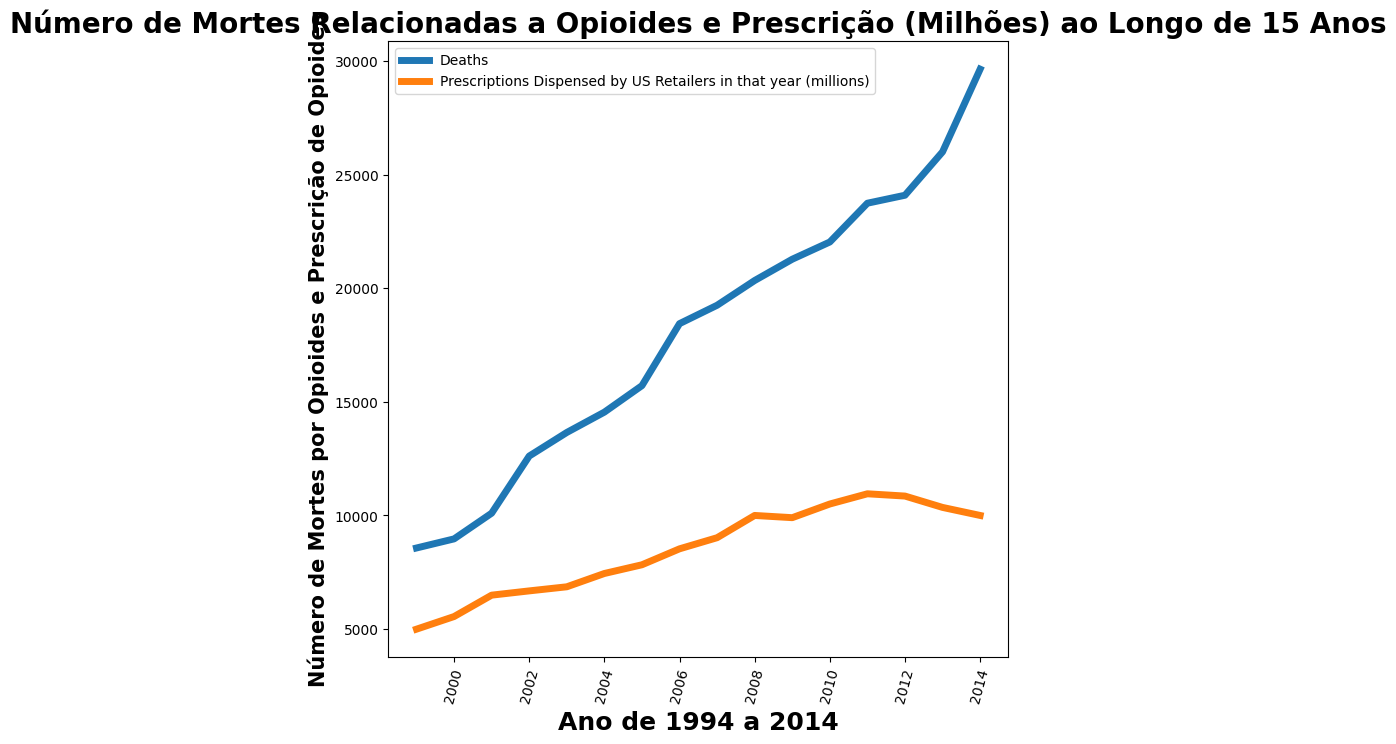

In [17]:
# Armazenar o DataFrame de anos agrupados versus prescrições em milhões e mortes ao longo dos anos por estados
avg_prescrip = data.groupby('Year')[['Deaths', 'Prescriptions Dispensed by US Retailers in that year (millions)']].sum().sort_values(by='Year', ascending=False)

# Plotar o gráfico de linha
prescrip_effect = avg_prescrip.plot(kind='line', figsize=(8, 8), legend=True, linewidth=5)

# Adicionar título e rótulos dos eixos
plt.title('Número de Mortes Relacionadas a Opioides e Prescrição (Milhões) ao Longo de 15 Anos', fontsize=20, fontweight='bold')
plt.ylabel('Número de Mortes por Opioides e Prescrição de Opioides', fontsize=15, fontweight='bold')
plt.xlabel('Ano de 1994 a 2014', fontsize=18, fontweight='bold')
plt.xticks(rotation=75)
plt.show()


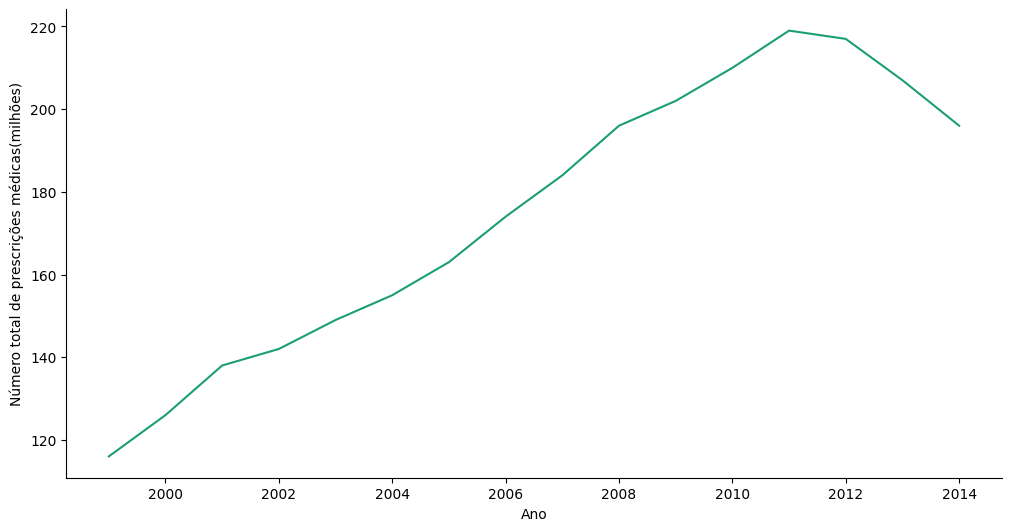

In [18]:
# @title Year vs Prescriptions Dispensed by US Retailers in that year (millions)

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Prescriptions Dispensed by US Retailers in that year (millions)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ano')
_ = plt.ylabel('Número total de prescrições médicas(milhões)')

### California


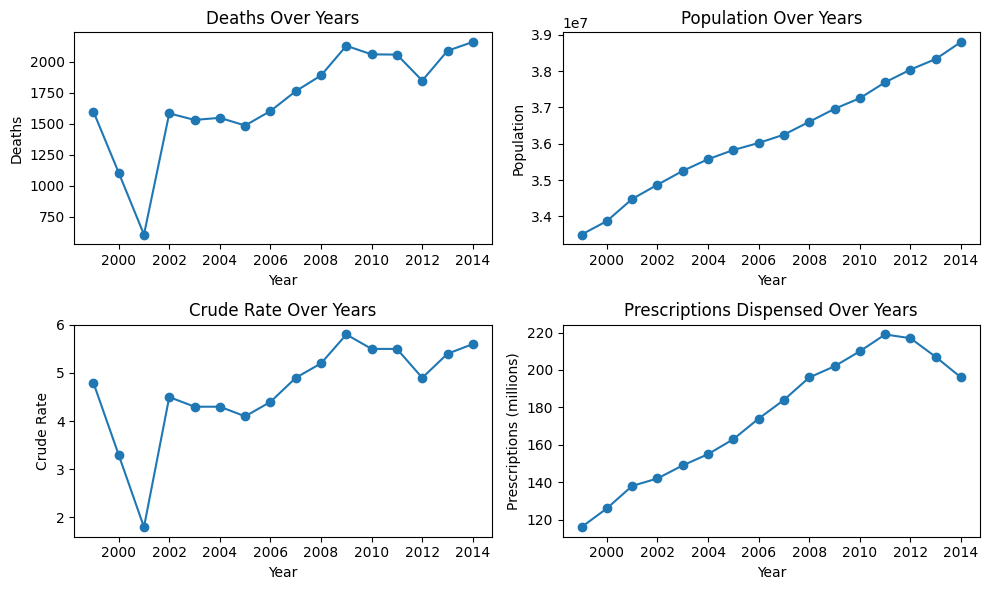

In [19]:
# Filtrar os dados para o estado de Alabama
california_data = data[data['State'] == 'California']

# Plotar os gráficos de linhas
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(california_data['Year'], california_data['Deaths'], marker='o')
plt.title('Deaths Over Years')
plt.xlabel('Year')
plt.ylabel('Deaths')

plt.subplot(2, 2, 2)
plt.plot(california_data['Year'], california_data['Population'], marker='o')
plt.title('Population Over Years')
plt.xlabel('Year')
plt.ylabel('Population')

plt.subplot(2, 2, 3)
plt.plot(california_data['Year'], california_data['Crude Rate'], marker='o')
plt.title('Crude Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Crude Rate')

plt.subplot(2, 2, 4)
plt.plot(california_data['Year'], california_data['Prescriptions Dispensed by US Retailers in that year (millions)'], marker='o')
plt.title('Prescriptions Dispensed Over Years')
plt.xlabel('Year')
plt.ylabel('Prescriptions (millions)')

plt.tight_layout()
plt.show()

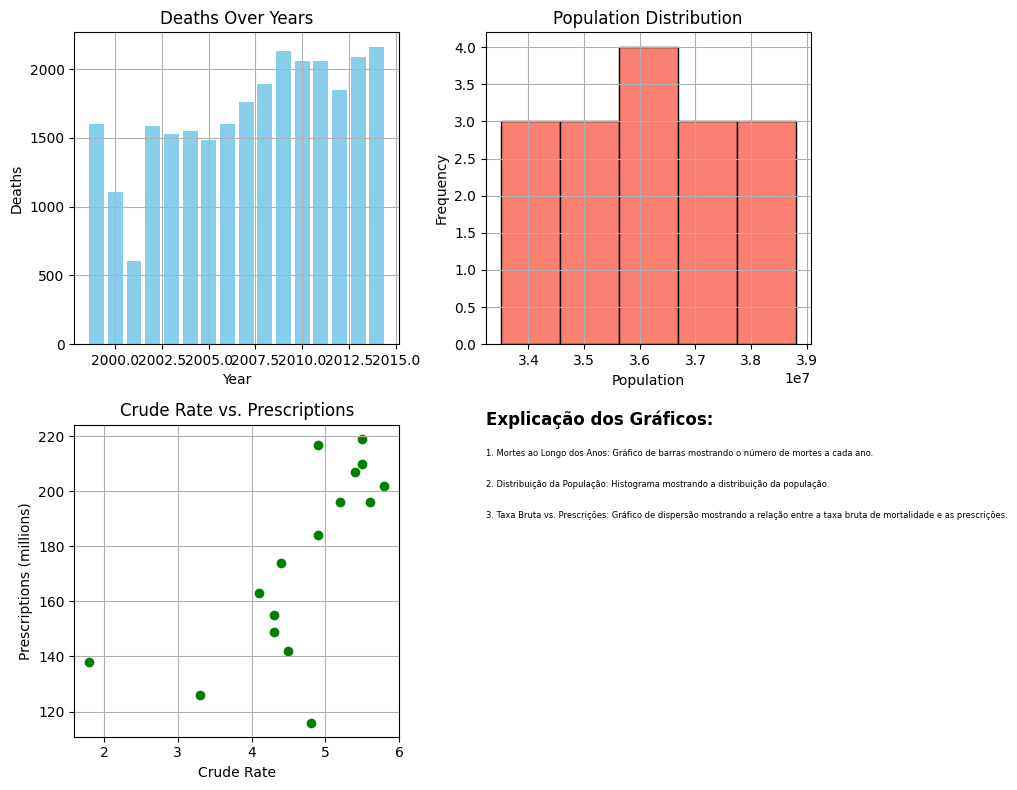

In [20]:
# Gráfico de Barras para Mortes por Ano
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.bar(california_data['Year'], california_data['Deaths'], color='skyblue')
plt.title('Deaths Over Years')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.grid(True)

# Histograma para a Distribuição da População
plt.subplot(2, 2, 2)
plt.hist(california_data['Population'], bins=5, color='salmon', edgecolor='black')
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(True)

# Gráfico de Dispersão para Taxa Bruta de Mortalidade vs. Prescrições
plt.subplot(2, 2, 3)
plt.scatter(california_data['Crude Rate'], california_data['Prescriptions Dispensed by US Retailers in that year (millions)'], color='green')
plt.title('Crude Rate vs. Prescriptions')
plt.xlabel('Crude Rate')
plt.ylabel('Prescriptions (millions)')
plt.grid(True)

# Legenda explicativa dos gráficos
plt.subplot(2, 2, 4).axis('off')
plt.text(0, 1, 'Explicação dos Gráficos:', fontsize=12, fontweight='bold')
plt.text(0, 0.9, '1. Mortes ao Longo dos Anos: Gráfico de barras mostrando o número de mortes a cada ano.', fontsize=6)
plt.text(0, 0.8, '2. Distribuição da População: Histograma mostrando a distribuição da população.', fontsize=6)
plt.text(0, 0.7, '3. Taxa Bruta vs. Prescrições: Gráfico de dispersão mostrando a relação entre a taxa bruta de mortalidade e as prescrições.', fontsize=6)


plt.tight_layout()
plt.show()

### Alabama

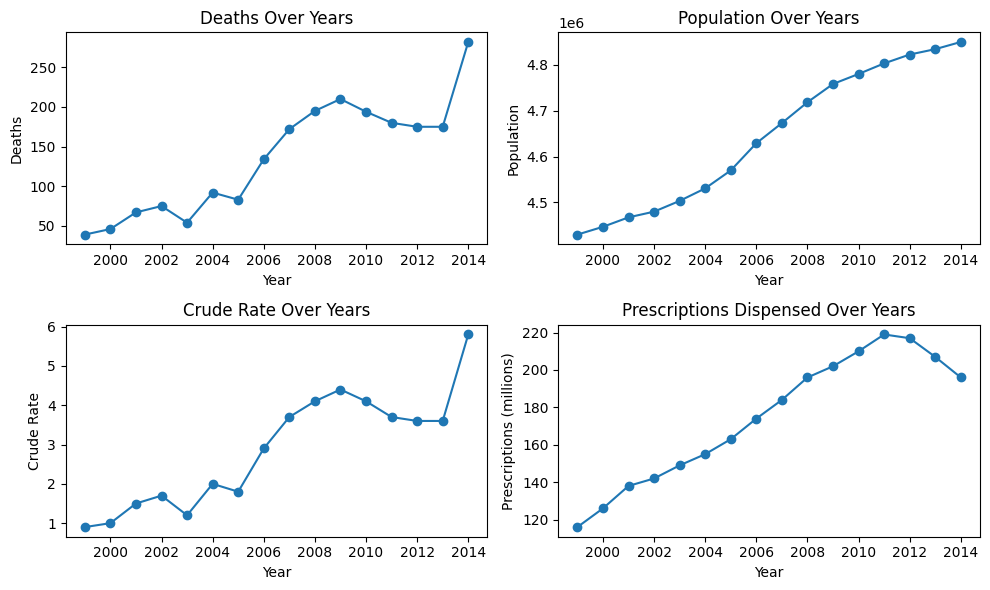

In [21]:
# Filtrar os dados para o estado de Alabama
alabama_data = data[data['State'] == 'Alabama']

# Plotar os gráficos de linhas
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(alabama_data['Year'], alabama_data['Deaths'], marker='o')
plt.title('Deaths Over Years')
plt.xlabel('Year')
plt.ylabel('Deaths')

plt.subplot(2, 2, 2)
plt.plot(alabama_data['Year'], alabama_data['Population'], marker='o')
plt.title('Population Over Years')
plt.xlabel('Year')
plt.ylabel('Population')

plt.subplot(2, 2, 3)
plt.plot(alabama_data['Year'], alabama_data['Crude Rate'], marker='o')
plt.title('Crude Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Crude Rate')

plt.subplot(2, 2, 4)
plt.plot(alabama_data['Year'], alabama_data['Prescriptions Dispensed by US Retailers in that year (millions)'], marker='o')
plt.title('Prescriptions Dispensed Over Years')
plt.xlabel('Year')
plt.ylabel('Prescriptions (millions)')

plt.tight_layout()
plt.show()

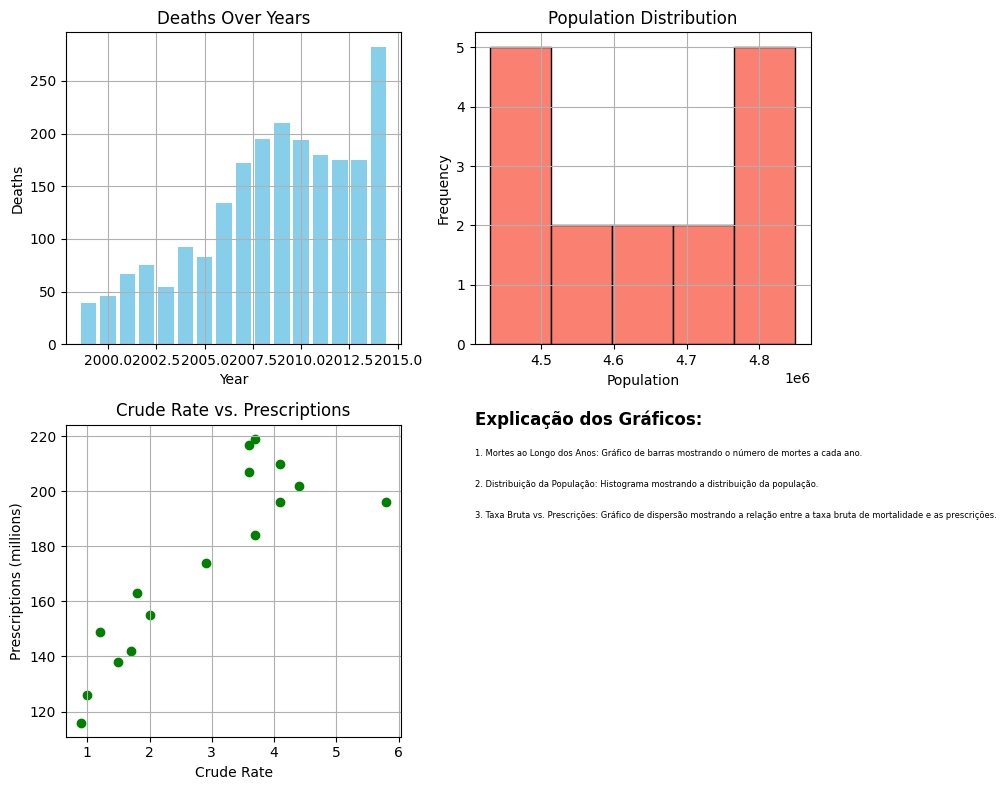

In [22]:
# Gráfico de Barras para Mortes por Ano
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.bar(alabama_data['Year'], alabama_data['Deaths'], color='skyblue')
plt.title('Deaths Over Years')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.grid(True)

# Histograma para a Distribuição da População
plt.subplot(2, 2, 2)
plt.hist(alabama_data['Population'], bins=5, color='salmon', edgecolor='black')
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(True)

# Gráfico de Dispersão para Taxa Bruta de Mortalidade vs. Prescrições
plt.subplot(2, 2, 3)
plt.scatter(alabama_data['Crude Rate'], alabama_data['Prescriptions Dispensed by US Retailers in that year (millions)'], color='green')
plt.title('Crude Rate vs. Prescriptions')
plt.xlabel('Crude Rate')
plt.ylabel('Prescriptions (millions)')
plt.grid(True)

# Legenda explicativa dos gráficos
plt.subplot(2, 2, 4).axis('off')
plt.text(0, 1, 'Explicação dos Gráficos:', fontsize=12, fontweight='bold')
plt.text(0, 0.9, '1. Mortes ao Longo dos Anos: Gráfico de barras mostrando o número de mortes a cada ano.', fontsize=6)
plt.text(0, 0.8, '2. Distribuição da População: Histograma mostrando a distribuição da população.', fontsize=6)
plt.text(0, 0.7, '3. Taxa Bruta vs. Prescrições: Gráfico de dispersão mostrando a relação entre a taxa bruta de mortalidade e as prescrições.', fontsize=6)


plt.tight_layout()
plt.show()

## Correlação das variáveis

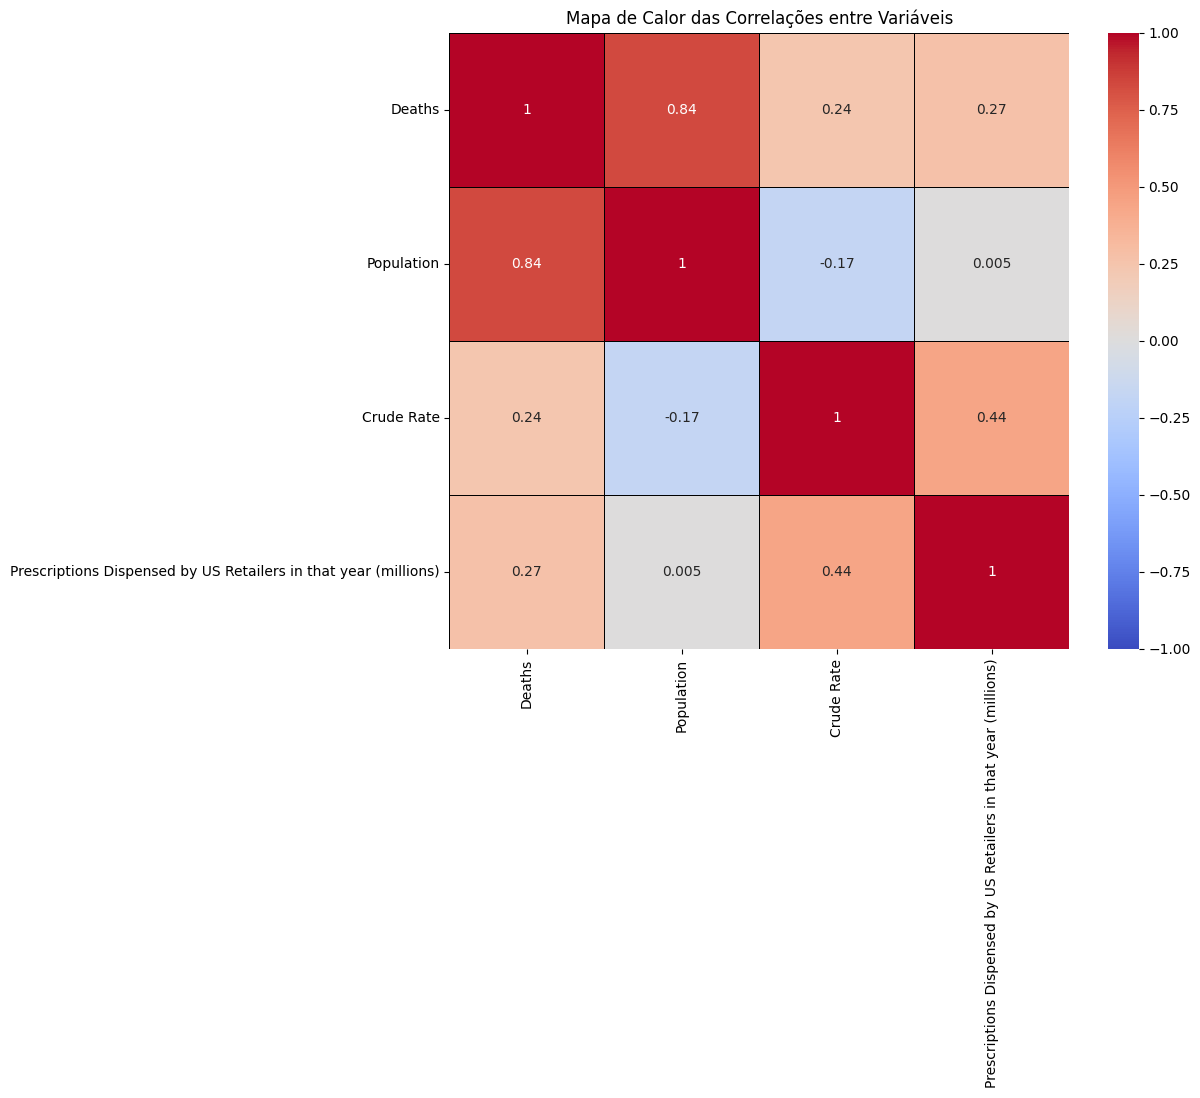

In [23]:
# Selecionar as colunas relevantes para a correlação
correlation_data = data[['Deaths', 'Population', 'Crude Rate', 'Prescriptions Dispensed by US Retailers in that year (millions)']]

# Calcular a matriz de correlação
correlation_matrix = correlation_data.corr()

# Plotar o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Mapa de Calor das Correlações entre Variáveis')
plt.show()

## Dashboard com Plotly Dash

In [24]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


# Converter colunas relevantes para numérico
data[['Deaths', 'Population', 'Crude Rate', 'Prescriptions Dispensed by US Retailers in that year (millions)']] = data[['Deaths', 'Population', 'Crude Rate', 'Prescriptions Dispensed by US Retailers in that year (millions)']].apply(pd.to_numeric, errors='coerce')

# Filtrar os dados para o ano de 2014
data_2014 = data[data['Year'] == 2014]

# Calcular a matriz de correlação
correlation_data = data[['Deaths', 'Population', 'Crude Rate', 'Prescriptions Dispensed by US Retailers in that year (millions)']]
correlation_matrix = correlation_data.corr()

# Calcular o DataFrame agrupado
avg_prescrip = data.groupby('Year')[['Deaths', 'Prescriptions Dispensed by US Retailers in that year (millions)']].sum().sort_values(by='Year', ascending=False)

# Criar o gráfico de linha com Plotly
line_fig = go.Figure()

line_fig.add_trace(go.Scatter(
    x=avg_prescrip.index, 
    y=avg_prescrip['Deaths'], 
    mode='lines', 
    name='Deaths',
    line=dict(width=5)
))

line_fig.add_trace(go.Scatter(
    x=avg_prescrip.index, 
    y=avg_prescrip['Prescriptions Dispensed by US Retailers in that year (millions)'], 
    mode='lines', 
    name='Prescriptions Dispensed by US Retailers in that year (millions)',
    line=dict(width=5)
))

line_fig.update_layout(
    title='Número de Mortes Relacionadas a Opioides e Prescrição (Milhões) ao Longo de 15 Anos',
    xaxis_title='Ano de 1994 a 2014',
    yaxis_title='Número de Mortes por Opioides e Prescrição de Opioides',
    xaxis=dict(tickangle=75),
    width=800,
    height=800
)

# Inicializar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Dashboard de Análise de Overdose por Opioides'),

    dcc.Tabs([
        dcc.Tab(label='Gráfico de Linha', children=[
            dcc.Graph(
                id='line-plot',
                figure=line_fig
            )
        ]),
        
        dcc.Tab(label='Gráfico de Dispersão', children=[
            dcc.Graph(
                id='scatter-plot',
                figure=px.scatter(data_2014, x='Prescriptions Dispensed by US Retailers in that year (millions)', y='Deaths',
                                  size='Population', color='State',
                                  hover_name='State', log_x=True, size_max=60,
                                  title='Prescrições vs Mortes (2014)')
            )
        ]),

        dcc.Tab(label='Gráfico de Barras', children=[
            dcc.Graph(
                id='bar-plot',
                figure=px.bar(data_2014, x='State', y='Deaths',
                              title='Mortes por Estado (2014)')
            )
        ]),

        dcc.Tab(label='Mapa de Calor das Correlações', children=[
            dcc.Graph(
                id='heatmap',
                figure=px.imshow(correlation_matrix,
                                 labels=dict(x="Variáveis", y="Variáveis", color="Correlação"),
                                 x=correlation_matrix.columns,
                                 y=correlation_matrix.columns,
                                 title='Mapa de Calor das Correlações entre Variáveis')
            )
        ]),
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True)
